# **LDA Iris dataset**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
np.set_printoptions(precision=4)

### read dataset

In [28]:
df = pd.read_csv('./iris.csv', header=None)
df = df[1:]
df.head()


,0,1,2,3,4
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### Encode Categorical Class Labels

In [29]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df[4].values)


### Standardize Features

In [30]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(df.iloc[:, range(0, 4)].values)

### Construct within-class covariant scatter matrix S_W

In [31]:
S_W = np.zeros((4, 4))
for i in range(3):
    S_W += np.cov(x_train_std[y==i].T)

In [32]:
S_W

array([[1.1672, 0.7759, 0.3461, 0.1837],
       [0.7759, 1.8343, 0.2168, 0.2973],
       [0.3461, 0.2168, 0.1795, 0.0958],
       [0.1837, 0.2973, 0.0958, 0.2177]])

### Construct between-class scatter matrix S_B

In [33]:
N = np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(x_train_std[y==i], axis=0)) for i in range(3)] #class means
mean_overall = np.mean(x_train_std, axis=0) # overall mean
S_B = np.zeros((4, 4))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(4, 1)).dot(((vecs[i]-mean_overall).reshape(1, 4))))

In [34]:
S_B

array([[ 92.8059, -55.6529, 113.8044, 113.6876],
       [-55.6529,  60.1174, -74.8911, -69.489 ],
       [113.8044, -74.8911, 141.2058, 139.7375],
       [113.6876, -69.489 , 139.7375, 139.3324]])

### Calculating the sorted Eigenvalues and Eigenvectors of inverse(S_W)dot(S_B)

In [35]:
from sympy import true


eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in decending order : ')
for eigen_vals in eigen_pairs: 
    print(eigen_vals[0])

Eigenvalues in decending order : 
1577.404530715622
13.984161088530517
2.885568221911252e-13
2.464754463682132e-14


### Project original features onto the new features space

In [36]:
W = np.hstack((eigen_pairs[0][1][:, ].reshape(4, 1), eigen_pairs[1][1][:, ].reshape(4, 1))).real
x_train_lda = x_train_std.dot(W)

### Plot transformed features in LDA subspace

In [37]:
data = pd.DataFrame(x_train_lda)
data['class']=y
data.columns=['LD1', 'LD2', 'class']
data.head()

,LD1,LD2,class
0,1.781849,0.104751,0
1,1.575609,-0.274293,0
2,1.655430,-0.092534,0
3,1.505879,-0.233836,0
4,1.797434,0.179383,0


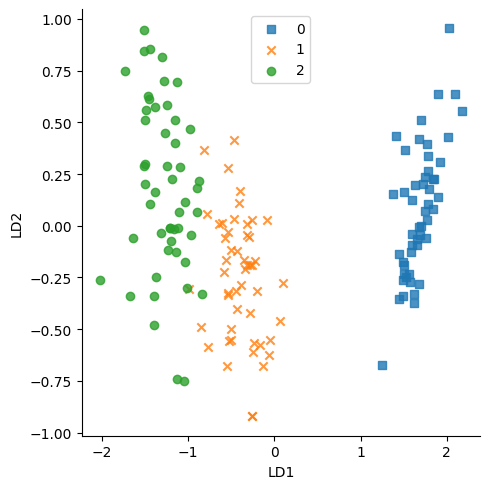

In [40]:
markers = ['s', 'x', 'o']
sns.lmplot(x='LD1', y='LD2', data=data, markers=markers, fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()

# **LDA implementation using Scikit-learn**

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
x_train_lda = lda.fit_transform(x_train_std, y)


In [42]:
data = pd.DataFrame(x_train_lda)
data['class']=y
data.columns=['LD1', 'LD2', 'class']
data.head()

,LD1,LD2,class
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0


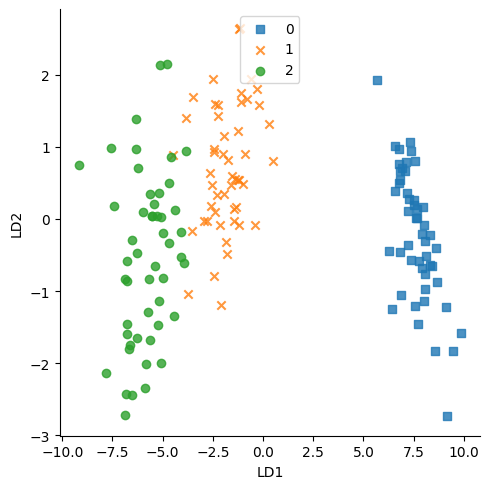

In [43]:
markers= ['s', 'x', 'o']
colors = ['r', 'b', 'g']
sns.lmplot(x='LD1', y='LD2', data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()